<a href="https://colab.research.google.com/github/linarahmatin/PCVK25_3F_30/blob/main/Week5_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nama  : Sesy Tana Lina Rahmatin
#Kelas : TI 3F
#Nim   : 2341720029


#D-1 PERCOBAAN HISTOGRAM

In [ ]:
from google.colab import drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

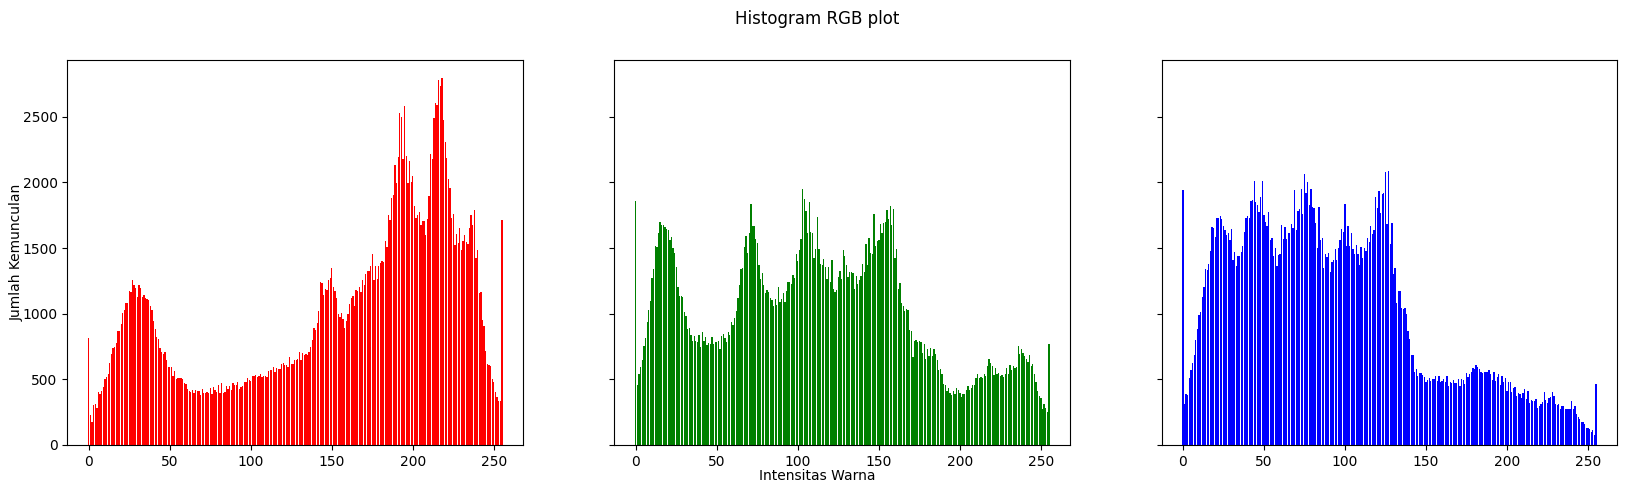

In [ ]:
#membuat histogram image (manual)
img = cv.imread ('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_30/Gambar/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)


red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0,height) :
    for x in range(0,width) :
        red[img[y][x][0]] += 1
        green[img[y][x][1]] += 1
        blue[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
axs[0].set_ylabel('Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

#PERTANYAAN PRAKTIKUM D1


1. Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh
NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

    Jawab:Hasilnya tetap sama dengan versi manual. Bedanya, np.histogram lebih ringkas dan cepat dibandingkan menggunakan loop manual

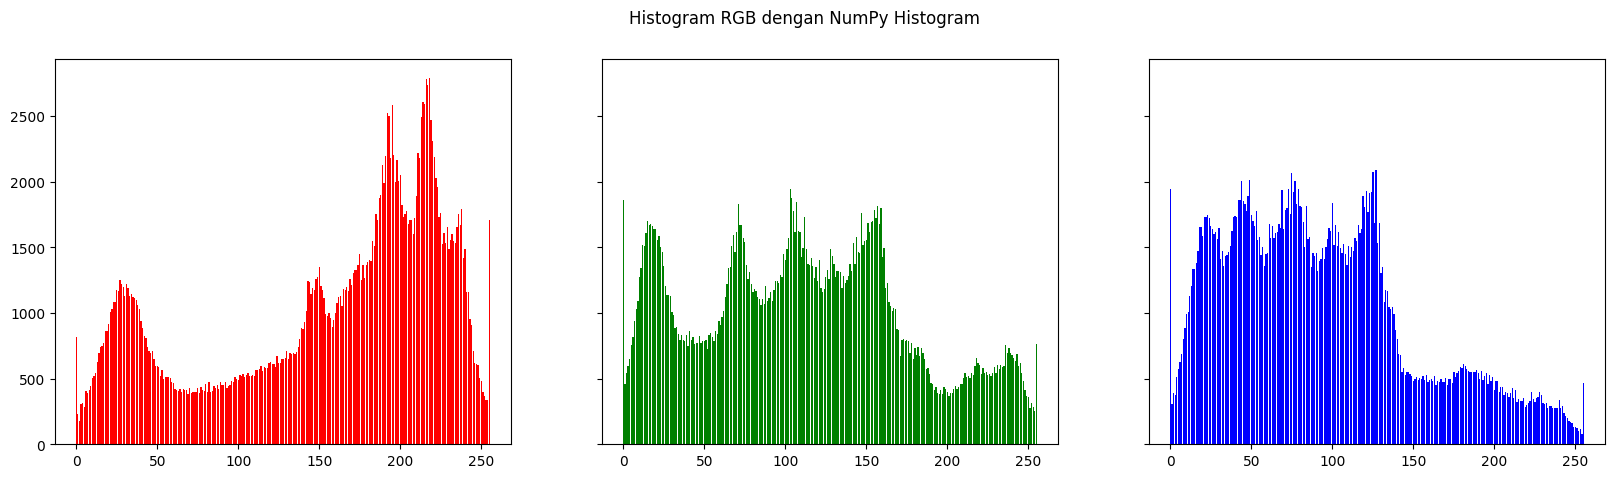

In [ ]:
img = cv.imread ('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_30/Gambar/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

red_channel   = img[:,:,0].ravel()
green_channel = img[:,:,1].ravel()
blue_channel  = img[:,:,2].ravel()

# Histogram dengan NumPy
red_hist, bins = np.histogram(red_channel, bins=256, range=(0,256))
green_hist, bins = np.histogram(green_channel, bins=256, range=(0,256))
blue_hist, bins = np.histogram(blue_channel, bins=256, range=(0,256))

# Plot hasil
fig, axs = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)
axs[0].bar(bins[:-1], red_hist, color='red')
axs[1].bar(bins[:-1], green_hist, color='green')
axs[2].bar(bins[:-1], blue_hist, color='blue')
fig.suptitle("Histogram RGB dengan NumPy Histogram")
plt.show()


2. Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg.
Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung
gelap, terang, atau kontras rendah.

    Jawab: Gambar KTM lama.jpg cenderung terang dengan kontras rendah, karena distribusi intensitas didominasi oleh nilai tinggi (mendekati putih)

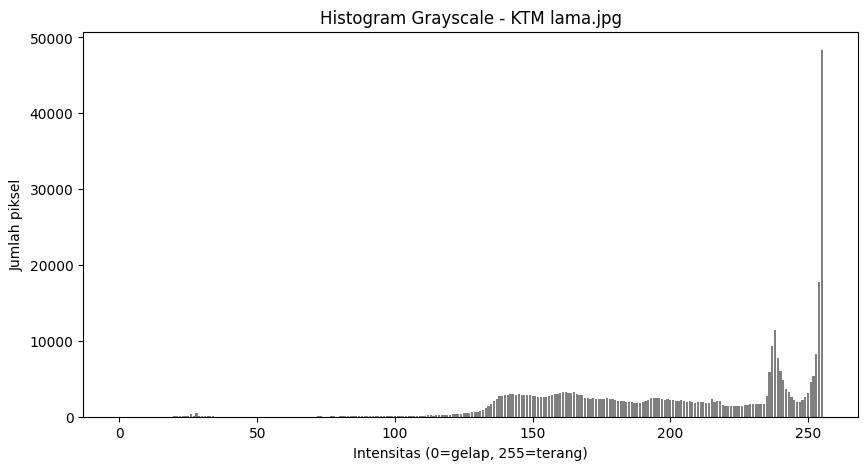

In [ ]:
img2 = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_30/Gambar/KTM lama.jpg')
gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# Histogram
hist, bins = np.histogram(gray.ravel(), bins=256, range=(0,256))

# Plot
plt.figure(figsize=(10,5))
plt.bar(bins[:-1], hist, color='gray')
plt.title("Histogram Grayscale - KTM lama.jpg")
plt.xlabel("Intensitas (0=gelap, 255=terang)")
plt.ylabel("Jumlah piksel")
plt.show()

#D-2 PERCOBAAN HISTOGRAM EQUALIZATION

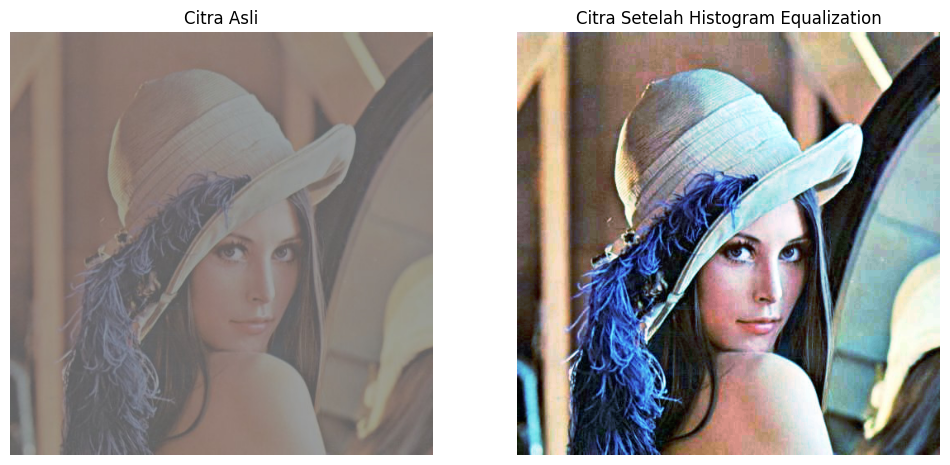

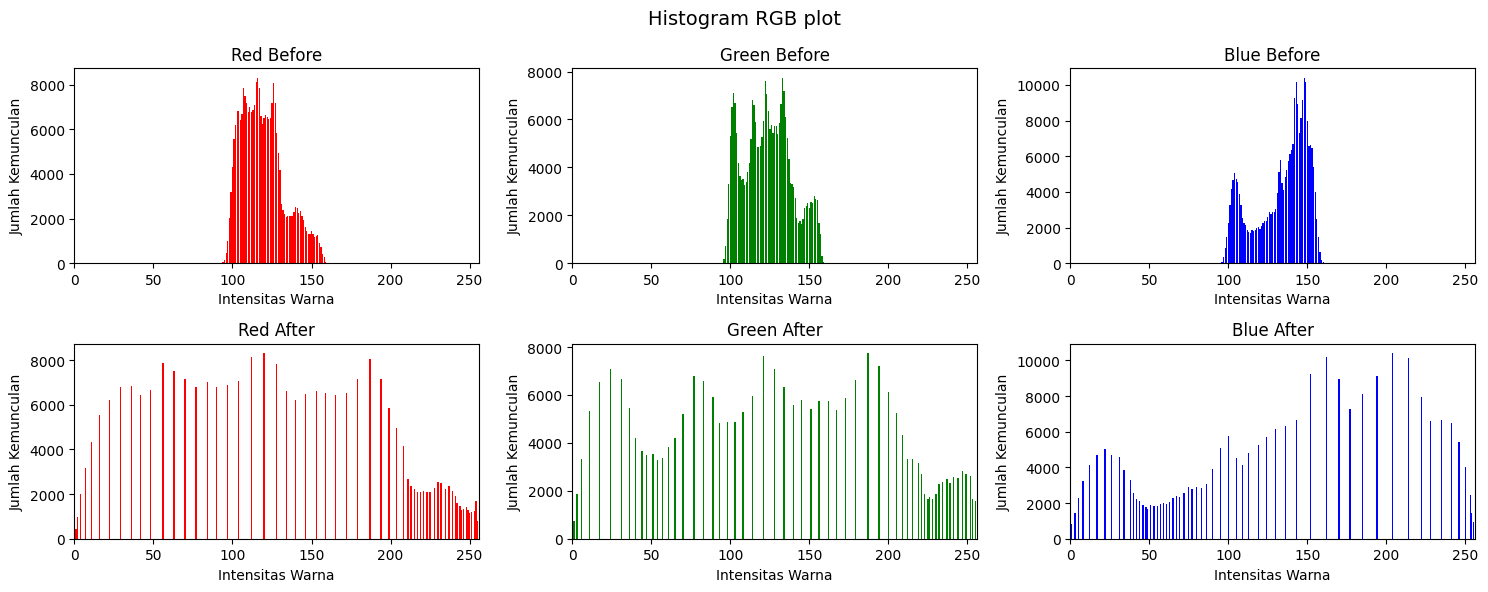

In [7]:
# Baca gambar
img = cv.imread("/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_30/Gambar/lena_lc.jpg")

# --- Split channel ---
b, g, r = cv.split(img)

# --- Histogram Equalization tiap channel ---
b_eq = cv.equalizeHist(b)
g_eq = cv.equalizeHist(g)
r_eq = cv.equalizeHist(r)

# --- Gabungkan kembali ---
img_eq = cv.merge((b_eq, g_eq, r_eq))

# --- Tampilkan citra sebelum & sesudah ---
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(img_eq, cv.COLOR_BGR2RGB))
plt.title("Citra Setelah Histogram Equalization")
plt.axis("off")
plt.show()

# --- Histogram RGB sebelum & sesudah ---
colors = ('r','g','b')
channel_names = ('Red','Green','Blue')

fig, axs = plt.subplots(2,3, figsize=(15,6))
fig.suptitle("Histogram RGB plot", fontsize=14)

for i, col in enumerate(colors):
    # Before
    hist_before = cv.calcHist([img],[i],None,[256],[0,256])
    axs[0,i].bar(np.arange(256), hist_before.ravel(), color=col)
    axs[0,i].set_title(f"{channel_names[i]} Before")
    axs[0,i].set_xlim([0,256])
    axs[0,i].set_xlabel("Intensitas Warna")
    axs[0,i].set_ylabel("Jumlah Kemunculan")

    # After
    hist_after = cv.calcHist([img_eq],[i],None,[256],[0,256])
    axs[1,i].bar(np.arange(256), hist_after.ravel(), color=col)
    axs[1,i].set_title(f"{channel_names[i]} After")
    axs[1,i].set_xlim([0,256])
    axs[1,i].set_xlabel("Intensitas Warna")
    axs[1,i].set_ylabel("Jumlah Kemunculan")

plt.tight_layout()
plt.show()

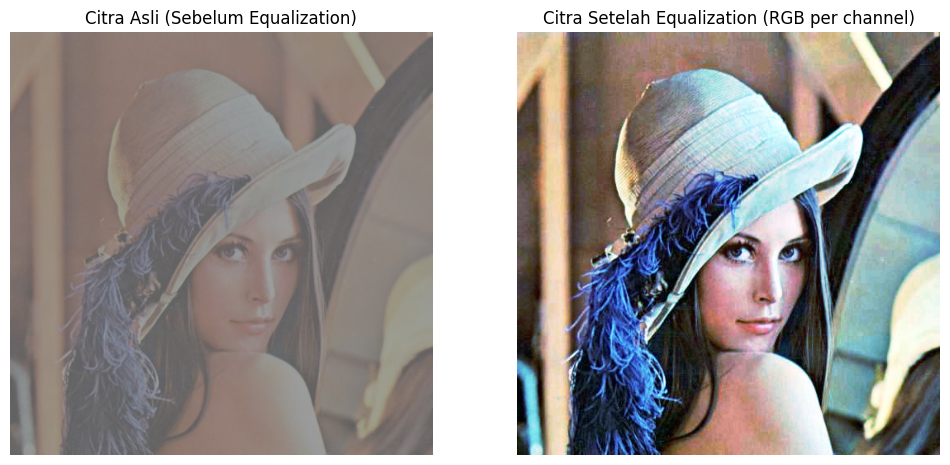

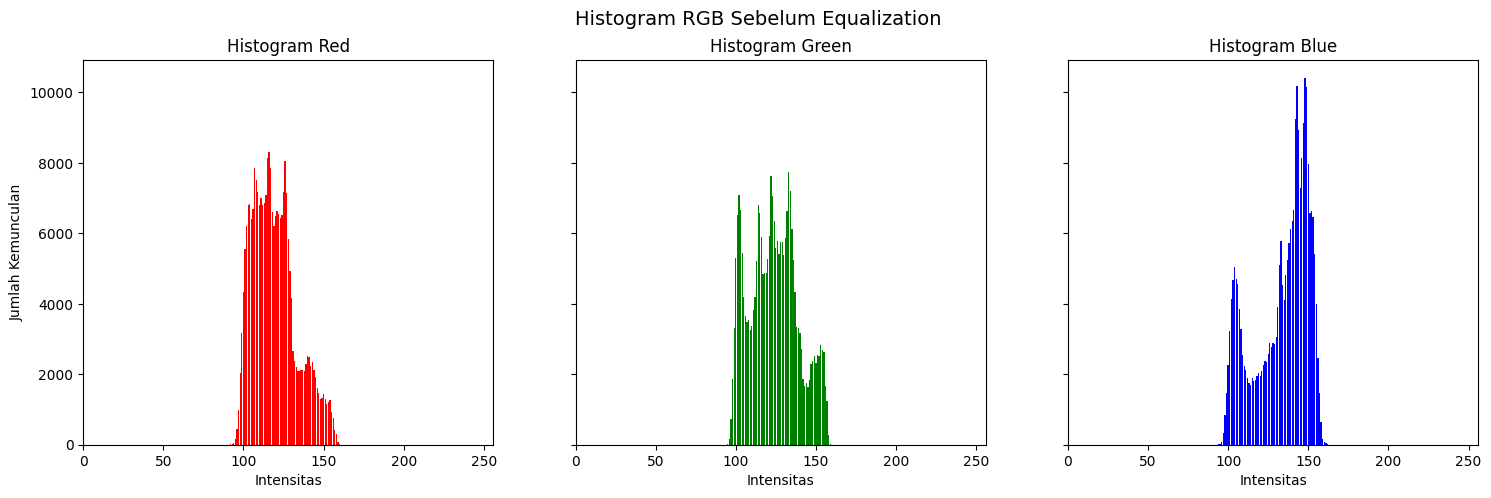

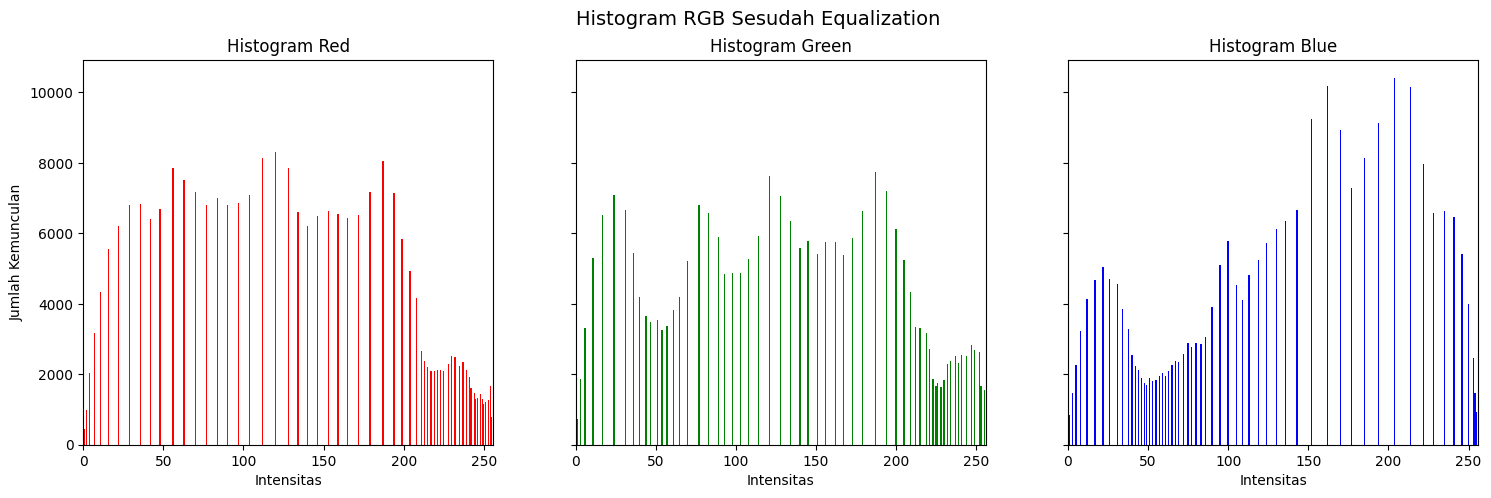

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_30/Gambar/lena_lc.jpg")

# Split ke R, G, B
B, G, R = cv.split(img)

# Histogram Equalization masing-masing channel
B_eq = cv.equalizeHist(B)
G_eq = cv.equalizeHist(G)
R_eq = cv.equalizeHist(R)
# Gabungkan kembali
img_eq = cv.merge((B_eq, G_eq, R_eq))

# Fungsi untuk menampilkan histogram per channel
def plot_histogram_subplot(img, title):
    channels = cv.split(img)
    colors = ('r', 'g', 'b')
    channel_names = ('Red', 'Green', 'Blue')
    fig, axs = plt.subplots(1, 3, figsize=(18,5), sharey=True)
    fig.suptitle(title, fontsize=14)

    for i, (ch, col) in enumerate(zip(channels, colors)):
        hist = cv.calcHist([ch],[0],None,[256],[0,256])
        axs[i].bar(np.arange(256), hist.ravel(), color=col)
        axs[i].set_title(f'Histogram {channel_names[i]}')
        axs[i].set_xlim([0,256])
        axs[i].set_xlabel("Intensitas")
        if i == 0:
            axs[i].set_ylabel("Jumlah Kemunculan")

    plt.show()

# Tampilkan gambar sebelum dan sesudah
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Citra Asli (Sebelum Equalization)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(img_eq, cv.COLOR_BGR2RGB))  # sudah pakai cv, bukan cv2
plt.title("Citra Setelah Equalization (RGB per channel)")
plt.axis("off")
plt.show()

# Histogram sebelum dan sesudah
plot_histogram_subplot(img, "Histogram RGB Sebelum Equalization")
plot_histogram_subplot(img_eq, "Histogram RGB Sesudah Equalization")
